Name : SARAN SADASIVAM
Reg no: 212225040385

=== Cross Validation ===
Fold R_2 scores :  ['0.6238', '0.6316', '0.3132', '0.3643', '-0.4944']
Average R_2     : 0.2877

=== Test Set Performance ===
MSE : 8482008.48
MAE : 2089.38
R_2 : 0.8926


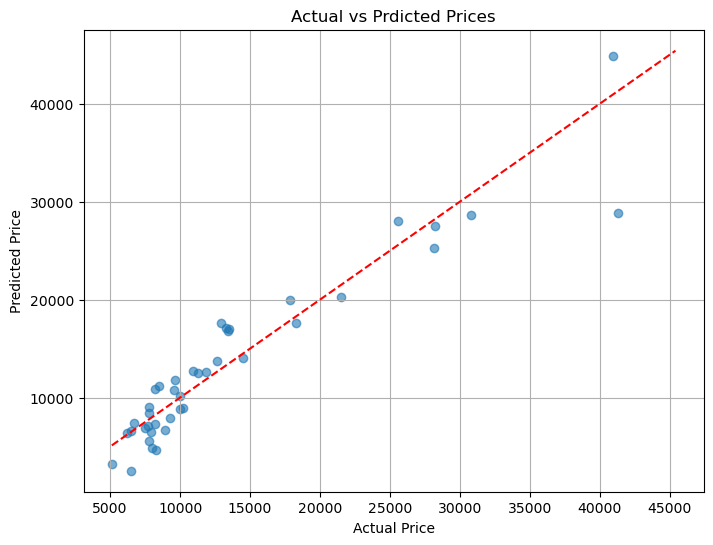

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt

data=pd.read_csv("CarPrice_Assignment.csv")
data.head()
data=data.drop(['car_ID','CarName'],axis=1)
data=pd.get_dummies(data,drop_first=True)
data.head()
x=data.drop('price',axis=1)
y=data['price']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)

print("Name : SARAN SADASIVAM")
print("Reg no: 212225040385")
print("\n=== Cross Validation ===")
cv_scores = cross_val_score(model,x,y,cv=5)
print("Fold R_2 scores : ",[f"{score:.4f}" for score in cv_scores])
print(f"Average R_2     : {cv_scores.mean():.4f}")

y_pred=model.predict(x_test)
print("\n=== Test Set Performance ===")
print(f"MSE : {mean_squared_error(y_test,y_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test,y_pred):.2f}")
print(f"R_2 : {r2_score(y_test,y_pred):.4f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Prdicted Prices")
plt.grid(True)
plt.show()